## Observations and Insights 

In [ ]:
# Observation 1: At the end of the study, mice treated with Ramicane and Capomulin had the lowest tumor volumes.
# Observation 2: For mouse b128 Capomulin effectively decreased the tumor volume by around 10 mm3.
# Observation 3: Mice being treated with Infubinol had the largest tumor volumes at the end of the study compared to other treatments.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].count()

num_mice


1893

In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_df.sort_values(by=["Mouse ID"], inplace=True)
clean_mice_df = merged_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"], keep="first")
clean_mice_df.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
454,a203,Infubinol,Female,20,23,0,45.000000,0


In [105]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_mice_df["Mouse ID"].count()
total_mice


1888

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_df = clean_mice_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})

summary_df 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.389178  50.909965  43.116372  6.566306  0.525725
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

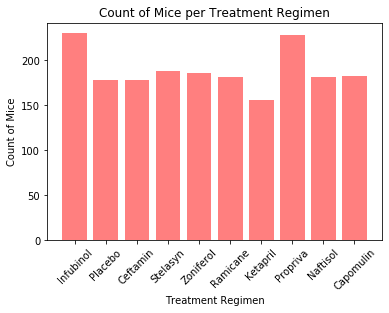

In [107]:
# SWITCHED STARTER CODE- Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis= clean_mice_df["Drug Regimen"].unique()
mice_count = clean_mice_df.groupby("Drug Regimen").count()["Mouse ID"]
plt.bar(x_axis, mice_count, color='r', alpha=0.5, align="center")

plt.title("Count of Mice per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.xticks(rotation=45)
plt.ylabel("Count of Mice")
plt.show()

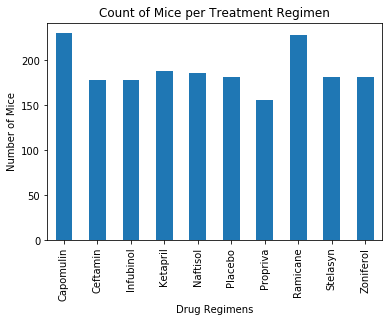

<Figure size 432x288 with 0 Axes>

In [108]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_df = clean_mice_df.groupby("Drug Regimen").count()["Mouse ID"]

treatment_chart = treatment_df.plot(kind="bar")
treatment_chart.set_title("Count of Mice per Treatment Regimen")
treatment_chart.set_xlabel("Drug Regimens")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()



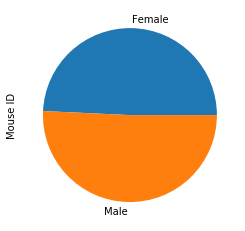

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_mice_df.groupby("Sex").count()["Mouse ID"]
gender_chart = gender_df.plot(kind="pie")

plt.show()

([<matplotlib.patches.Wedge at 0x1acde219ac8>,
 [Text(-1.099701533132135, 0.025622998006324282, 'male'),
  Text(1.099701530733132, -0.025623100967813024, 'female')])

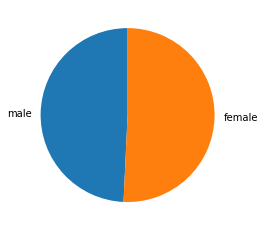

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = "male", "female"
counts = gender_df
explode = (0, 0)

fig1,ax1 = plt.subplots()
ax1.pie(counts, explode=explode, labels=labels, shadow=False, startangle=90)


## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find max for each mouse, don't group out drug regimens too early
tv_df = clean_mice_df.groupby(["Mouse ID"])["Timepoint"].max()
tv_df = tv_df.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge and pull left join to get only the mouse on the simplified array, join on mouse id and timepoint
new_tv_df = tv_df.merge(clean_mice_df, on=["Mouse ID", "Timepoint"], how= "left")

new_tv_df.head(20)




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [112]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drugs = []


    # Create an array, loop through df, if equal to four drugs and append anything in drug list to a new data series
for drug in drugs:
    tv_drugs_df = new_tv_df.loc[new_tv_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    four_drugs.append(tv_drugs_df)
    
    four_drugs

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    tv_quart = tv_drugs_df.quantile([.25,.5,.75])
    lowerq = tv_quart[0.25]
    upperq = tv_quart[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}:Lower Quartile: {lowerq}, Lower Bound: {lower_bound}, Upper Quartile: {upperq}, Upper Bound: {upper_bound}, IQR: {iqr}")


Capomulin:Lower Quartile: 32.37735684, Lower Bound: 20.70456164999999, Upper Quartile: 40.1592203, Upper Bound: 51.83201549, IQR: 7.781863460000004
Ramicane:Lower Quartile: 31.56046955, Lower Bound: 17.912664470000003, Upper Quartile: 40.65900627, Upper Bound: 54.30681135, IQR: 9.098536719999998
Infubinol:Lower Quartile: 54.04860769, Lower Bound: 36.83290494999999, Upper Quartile: 65.52574285, Upper Bound: 82.74144559000001, IQR: 11.477135160000003
Ceftamin:Lower Quartile: 48.72207785, Lower Bound: 25.355449580000002, Upper Quartile: 64.29983003, Upper Bound: 87.66645829999999, IQR: 15.577752179999997


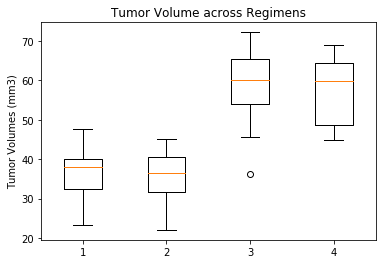

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume across Regimens")
ax1.set_ylabel("Tumor Volumes (mm3)")
ax1.boxplot(four_drugs)
plt.show()


## Line and Scatter Plots

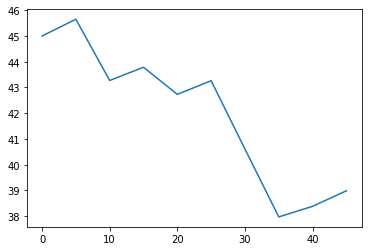

In [114]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_mice_df.loc[(clean_mice_df["Drug Regimen"] == "Capomulin")]
mouse_b128 = capomulin_df.loc[(capomulin_df["Mouse ID"] == "b128")]
mouse_b128 = mouse_b128.sort_values(by=["Timepoint"])

mouse_b128

timepoint = mouse_b128["Timepoint"]
tumor_volume = mouse_b128["Tumor Volume (mm3)"]

plt.plot(timepoint, tumor_volume)
plt.show()

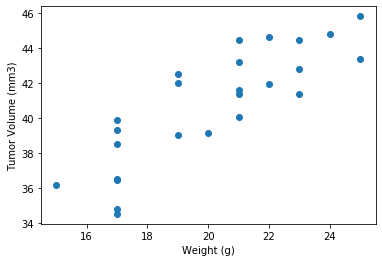

In [115]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen'

capomulin_df_grouped = capomulin_df.groupby("Mouse ID").mean()

capomulin_x = capomulin_df_grouped["Weight (g)"]
capomulin_y = capomulin_df_grouped["Tumor Volume (mm3)"]
plt.scatter(capomulin_x,capomulin_y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
 
plt.show()


## Correlation and Regression

y = 0.95x +21.55
The Correlation Coefficient: 0.7088568047708723


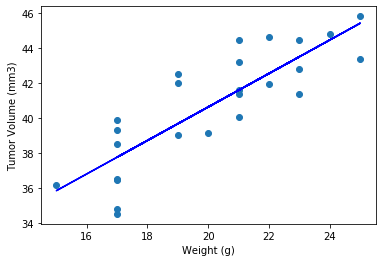

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on weight and average tumor volume fo Capomulin
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(capomulin_x, capomulin_y)

# Get regression values
regress = capomulin_x * slope + intercept

# Create line equation string
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line)

# Plot
plt.scatter(capomulin_x,capomulin_y)
plt.plot(capomulin_x,regress,"b-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Print the Correlation Coefficient
print(f"The Correlation Coefficient: {rvalue**2}")

# Show plot
plt.show()
